# Choropleths

A **choropleth** is a map in which areas are colored according to some statistic or variable of interest. Perhaps the most familiar example of a choropleth is the presidential election map, which shows the percentage in each county who voted for the Democratic or Republican candidate. In this graphic, the areal units are counties, and the statistic of interest is the percentage who voted for the Democratic (or Republican) candidate.

![](https://github.com/dlsun/pods/blob/master/12-Geospatial-Data/img/2016election.png?raw=1)

In this notebook, you will learn how to make choropleths like the one above.

## Shapefiles

The shapefile format is a data format for geometric objects, such as points, lines, and polygons. A shapefile can be used to describe the boundaries of a lake, the course of a river, or the boundaries of a county.

You can find shapefiles for most geographic entities online. For example, the [U.S. Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) maintains shapefiles for boundaries of states, counties, and congressional districts in the United States. Shapefiles for international data can be found [at the Natural Earth website](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/).

The U.S. county shapefiles - at resolution 1:500,000 - are located at https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip. If you look in the zip folder you'll notice that "shapefile" is somewhat of a misnomer, as the format refers not to a single file but a collection of files, all of which have the same filename but different extensions. The main extensions are:

- `.shp` - shape format, which stores the geometric objects
- `.shx` - shape index format, which indexes the objects to make them quickly searchable
- `.dbf` - attribute format, which stores additional metadata about each object
- `.prj` - projection format

`GeoPandas` makes it easy to read and create a `GeoDataFrame` from shape files.

In [1]:
#!pip install --upgrade geopandas

In [2]:
import pandas as pd

import geopandas as gpd

from matplotlib import pyplot as plt

In [3]:
zipfile = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip"

df_counties = gpd.read_file(zipfile)

df_counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


The geometry column contains information about "patches" like `Polygon`s for constructing maps. We can plot the county boundaries as in the previous notebook.

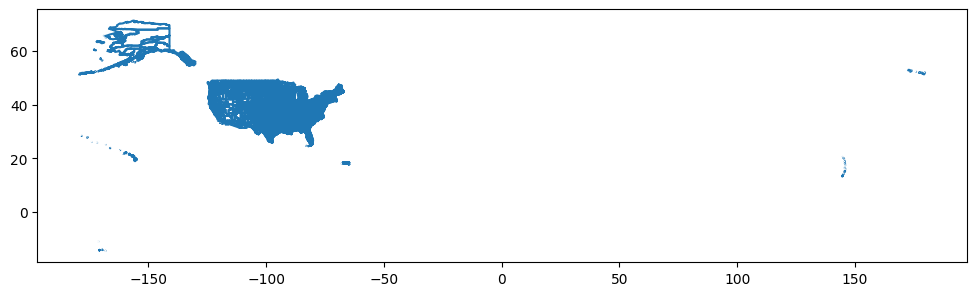

In [4]:
df_counties.boundary.plot(figsize=(12, 12));

Let's adjust the axes to zoom in on the continental U.S.

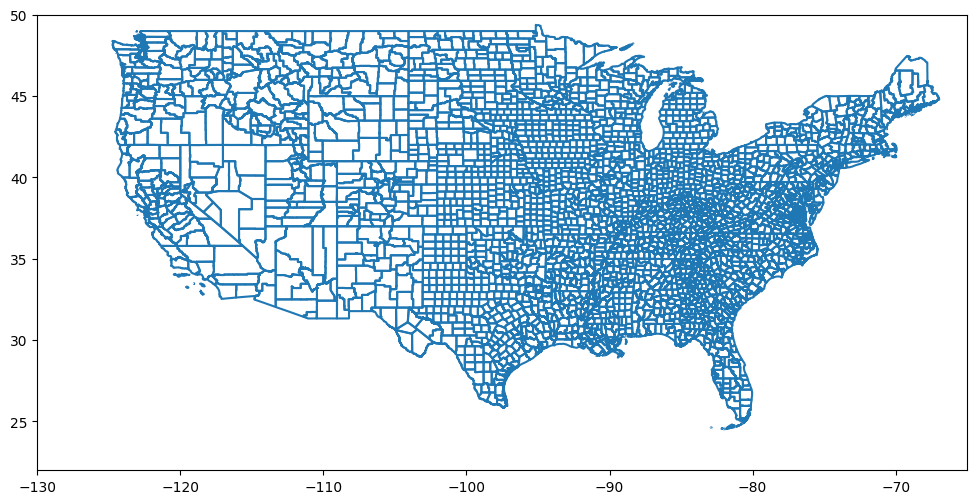

In [5]:
df_counties.boundary.plot(figsize=(12, 12));
plt.xlim(-130, -65);
plt.ylim(22, 50);

## Making Choropleths

A map graphic is a collection of patches. A "patch" is simply a 2-dimensional object with an edge color and face color. Examples of patches include circles, rectangles, and polygons. Since areal units---like countries, states, and counties---are polygons in general, the most important type of patch for making a choropleth is the `Polygon`. A `Polygon` is specified by a list of its vertices; see the **geometry** column. Thus, one way to create a choropleth is to draw the `Polygon` for each county, one at a time, setting the face color of each patch to an appropriate color based on the data value for that county. This requires that we maintain a color map that maps data values to colors.

For example, suppose we want to color each county according to the fraction of the county's area that is water. We first compute this fraction using the **ALAND** and **AWATER** columns.

In [6]:
df_counties["frac_water"] = df_counties["AWATER"] / (df_counties["AWATER"] + df_counties["ALAND"])
df_counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,frac_water
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",0.098007
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",0.006395
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",0.012477
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",0.009843
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",0.007894
...,...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",0.009873
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",0.003365
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",0.003278
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",0.796989


`GeoPandas` makes it easy to create choropleth maps. Simply use the `plot` command with the `column` argument set to the column whose values you want used to assign colors.

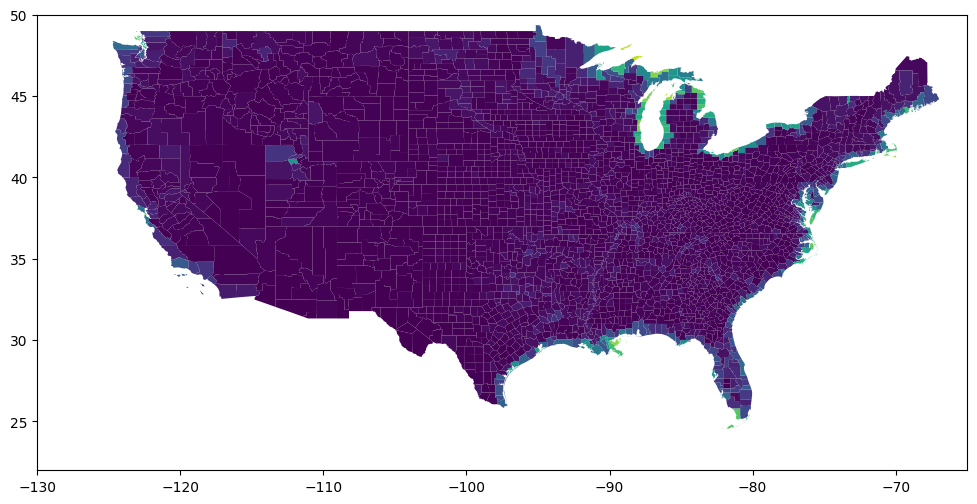

In [7]:
df_counties.plot(column='frac_water', figsize=(12, 12))
plt.xlim(-130, -65);
plt.ylim(22, 50);

We can control the colormap with the `cmap` argument. A list of the available colormaps can be found at the [Matplotlib website](https://matplotlib.org/users/colormaps.html). Since we are displaying the fraction of each county that is water, we'll use a blue color map (`Blues`). Notice that the counties that border major bodies of water tend to have a higher fraction of their area as water, which should make sense!

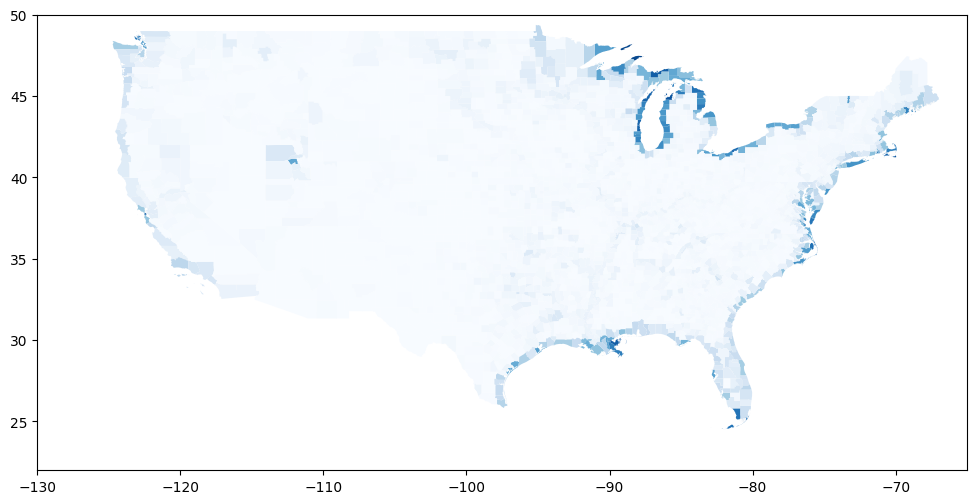

In [8]:
df_counties.plot(column='frac_water', cmap = "Blues", figsize=(12, 12));
plt.xlim(-130, -65);
plt.ylim(22, 50);

## Making Choropleths with Outside Data

In the above example, we made a choropleth from data that was already in the shapefile. But in general, the shapefile only contains minimal metadata about each areal unit. Suppose the data that we want to visualize resides in a separate file. For example, suppose we want to plot the 2016 presidential election results by county (specifically "per_dem", the percentage in the county who voted for the Democratic candidate, Hillary Clinton).

In [9]:
df_election = pd.read_csv("https://dlsun.github.io/pods/data/election2016.csv")
df_election

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003.0,130413.0,246588.0,0.377159,0.528870,"37,410",15.17%,AK,Alaska,2013
1,93003.0,130413.0,246588.0,0.377159,0.528870,"37,410",15.17%,AK,Alaska,2016
2,93003.0,130413.0,246588.0,0.377159,0.528870,"37,410",15.17%,AK,Alaska,2020
3,93003.0,130413.0,246588.0,0.377159,0.528870,"37,410",15.17%,AK,Alaska,2050
4,93003.0,130413.0,246588.0,0.377159,0.528870,"37,410",15.17%,AK,Alaska,2060
...,...,...,...,...,...,...,...,...,...,...
3136,3233.0,12153.0,16661.0,0.194046,0.729428,"8,920",53.54%,WY,Sweetwater County,56037
3137,7313.0,3920.0,12176.0,0.600608,0.321945,"3,393",27.87%,WY,Teton County,56039
3138,1202.0,6154.0,8053.0,0.149261,0.764187,"4,952",61.49%,WY,Uinta County,56041
3139,532.0,2911.0,3715.0,0.143203,0.783580,"2,379",64.04%,WY,Washakie County,56043


We will need to merge `df_election` with the `df_counties` `DataFrame` that we defined above. But what do we merge the `DataFrame`s on? It turns out that every county in the United States is assigned a unique ID called a [FIPS code](https://www.census.gov/library/reference/code-lists/ansi.html). The FIPS code appears in `df_election` as **combined_fips** and in `df_counties` as **GEOID**. Let's take a look at these columns.

In [10]:
df_election["combined_fips"]

0        2013
1        2016
2        2020
3        2050
4        2060
        ...  
3136    56037
3137    56039
3138    56041
3139    56043
3140    56045
Name: combined_fips, Length: 3141, dtype: int64

In [11]:
df_counties["GEOID"]

0       21007
1       21017
2       21031
3       21065
4       21069
        ...  
3228    31073
3229    39075
3230    48171
3231    55079
3232    26139
Name: GEOID, Length: 3233, dtype: object

Notice that `df_counties` treats the FIPS code as a string (so every FIPS code is exactly 5 digits, with a leading zero if necessary). On the other hand, `df_elections` treats the FIPS code as an integer. If we want to join the two, we will have to cast them to the same type. It is probably easier to convert the string to an integer than vice versa.

In [12]:
df_counties["GEOID"] = df_counties["GEOID"].astype(int)

Now we can merge `df_election` and `df_counties` to add the 2016 election results to our GeoDataFrame.

In [13]:
df_all = df_counties.merge(df_election,
                           how="left",
                           left_on="GEOID", right_on="combined_fips")
df_all

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",...,816.0,3161.0,4097.0,0.199170,0.771540,"2,345",57.24%,KY,Ballard County,21007.0
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",...,2791.0,5569.0,8791.0,0.317484,0.633489,"2,778",31.60%,KY,Bourbon County,21017.0
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",...,947.0,4428.0,5575.0,0.169865,0.794260,"3,481",62.44%,KY,Butler County,21031.0
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",...,1108.0,4236.0,5538.0,0.200072,0.764897,"3,128",56.48%,KY,Estill County,21065.0
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",...,1348.0,4722.0,6250.0,0.215680,0.755520,"3,374",53.98%,KY,Fleming County,21069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",...,165.0,792.0,1000.0,0.165000,0.792000,627,62.70%,NE,Gosper County,31073.0
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",...,1766.0,8578.0,10823.0,0.163171,0.792571,"6,812",62.94%,OH,Holmes County,39075.0
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",...,2286.0,10445.0,13123.0,0.174198,0.795931,"8,159",62.17%,TX,Gillespie County,48171.0
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",...,288986.0,126091.0,434970.0,0.664381,0.289884,"162,895",37.45%,WI,Milwaukee County,55079.0


One quick check is to make sure that `df_all` has the same number of rows as `df_counties`. This seems to be the case.

Now we can make a choropleth as before. There is just one catch. When we left-joined `df_counties` to `df_election`, some of the FIPS codes could not be matched. Therefore, these counties will be missing election data. Unfortunately, `matplotlib`'s color maps do not handle missing values gracefully, so we will have to handle these manually.

Let's first take a look at which states the counties with missing data were in.

In [14]:
missing_data = df_all[df_all.per_dem.isnull()].STATEFP.value_counts()

missing_data

72    78
60     5
69     4
78     3
02     1
66     1
15     1
Name: STATEFP, dtype: int64

[A list of FIPS State Codes can be found here](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code). The "states" that had more than one county missing election data are all outlying territories: Puerto Rico (72), Northern Mariana Islands (69), Virgin Islands (78), American Samoa (60), and Guam (66). It turns out that the two remaining states, each with exactly one county that could not be joined, are Alaska (02) and Hawaii (15), which do not show up on our map of the continental United States. So we could safely fill the missing values in `df_all` with an arbitrary value in the middle of the data range without affecting the appearance of the map, since none of these states/territories actually show up on the map. Since we're not displaying these counties anyway, we'll just remove them from the data frame.

In [15]:
df_all = df_all[~df_all["STATEFP"].isin(missing_data.index)]

Now we'll make a choropleth map of the percentage of votes cast for the Democratic candidate (Hillary Clinton) by county, using the `RdBu` colormap which maps 0 to red and 1 to blue. (Since we removed counties that aren't in the continental U.S., we don't have to adjust the axis limits anymore.)

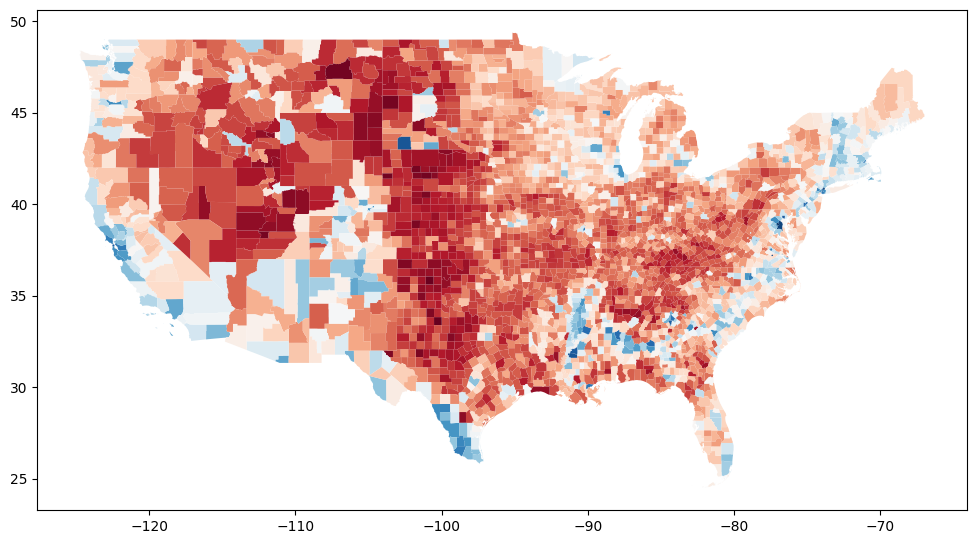

In [16]:
df_all.plot(column = "per_dem", cmap = "RdBu", figsize = (12, 12));

We can add a color bar legend with `legend=True`.

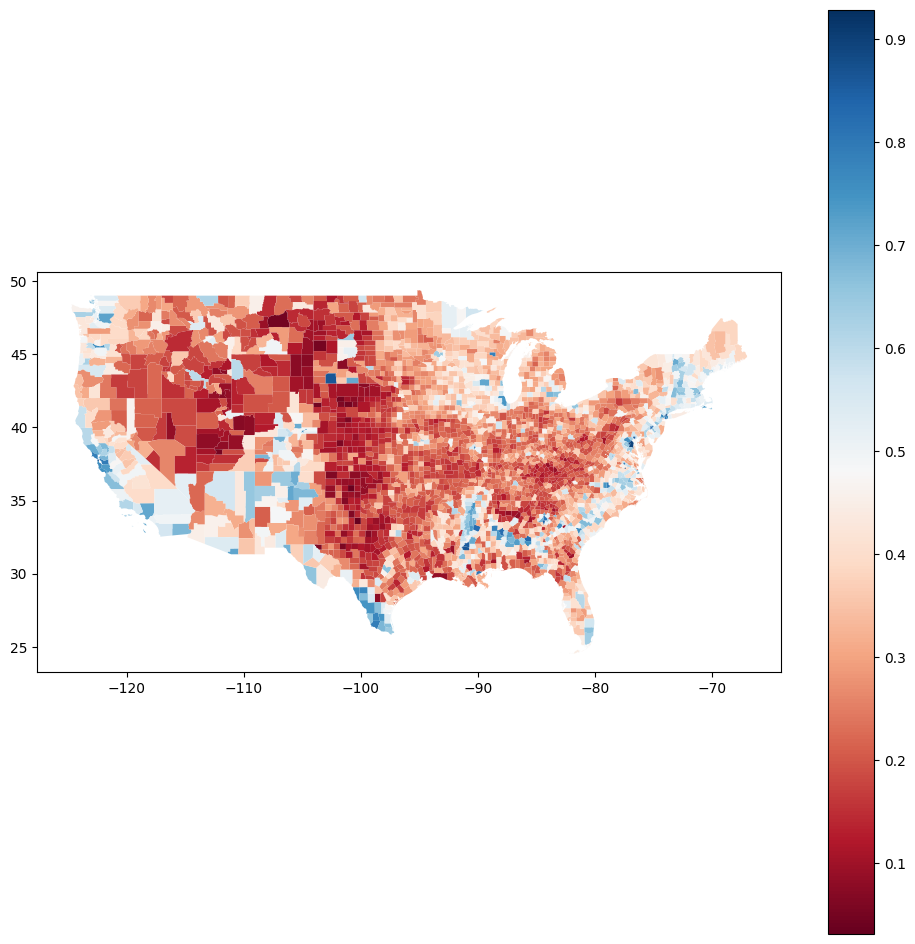

In [17]:
df_all.plot(column = "per_dem", cmap = "RdBu", legend=True, figsize = (12, 12));

Here is some additional formatting of the legend.

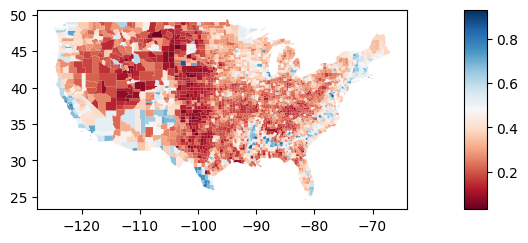

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

df_all.plot(column = "per_dem", cmap = "RdBu", ax=ax, legend=True, cax=cax);

Notice that the color scale is automatically calculated from the data so that some counties that went for Clinton may actually be colored red!
One way to fix this problem is to plot a different statistic: the difference between the percentage of votes for Clinton and the percentage of votes for Trump. We will also manually set the min and max of the color so that a difference of 0 is in the middle.

Finally, we'll change the projection by changing the CRS; note the change in scale on the axes.

/Users/sreshtalluri/micromamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(5500000.0, 9000000.0)

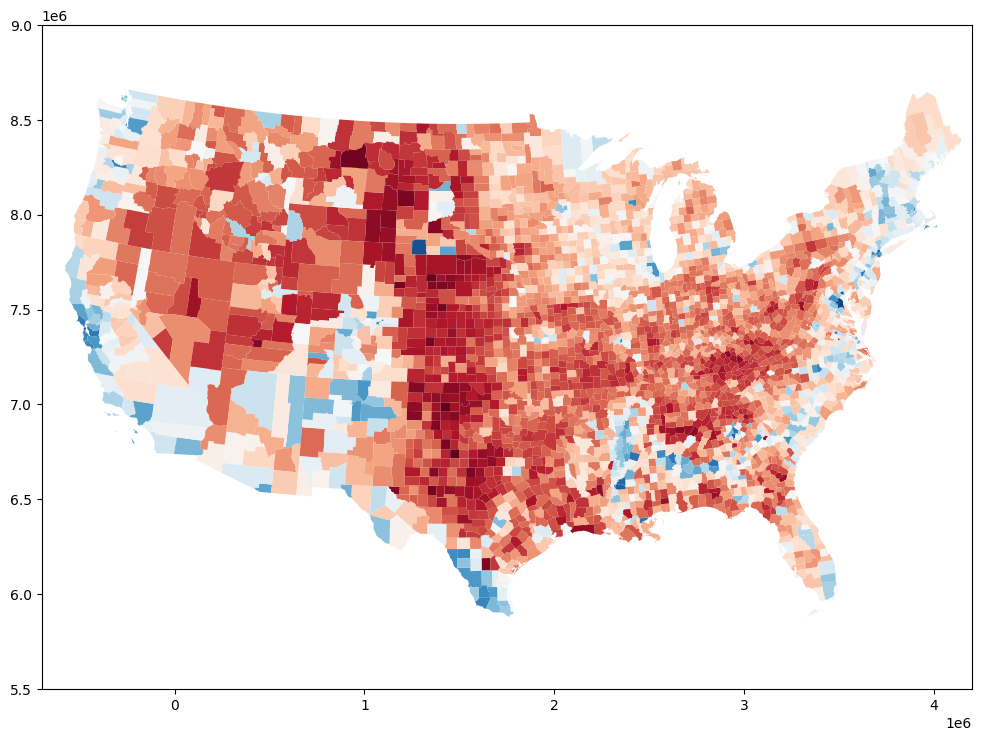

In [19]:
df_all["per_diff"] = df_all["per_dem"] - df_all["per_gop"]

ax = df_all.to_crs("EPSG:3082").plot(
    column="per_diff",
    figsize=(12, 12),
    cmap="RdBu", vmin=-0.9, vmax=0.9)
ax.set_xlim(-0.7e6, 4.2e6)
ax.set_ylim(0.55e7, 0.9e7)

## Problems with Choropleths

> "Oh, I love those beautiful red areas, that middle of the map.  There’s just a little blue here and a little blue there.  Everything else — everything else is bright red."
>
> -- Donald Trump

Choropleths can be misleading because they violate the *area principle*---the principle that the area on a graph should represent the magnitude of the data being presented. Since the geographic size of a county is often irrelevant to the data being presented, choropleths can easily be misinterpreted.

For example, President Donald Trump cites the large amount of red area on the 2016 electoral map as an indication of overwhelming support for him. However, the total amount of red area is a statistic that conflates two unrelated quantities: the geographic size of a county and the depth of support for Trump. In fact, most of the red area is in rural parts of the country where few people live. From the choropleth, one would never guess that more people actually voted for his opponent Hillary Clinton! She received strong support from urban areas, but unfortunately for her, cities can barely be seen on a map---despite being home to a majority of Americans.

It is important to be cautious when designing and interpreting choropleths. (Here is an interesting [*NY Times* article about mapping election results](https://www.nytimes.com/interactive/2016/11/01/upshot/many-ways-to-map-election-results.html).)